# Ensemble Learning Assignment Questions

## Theoretical

#### 1. Can we use Bagging for regression problems?

Answer -> Yes. You use a Bagging Regressor. Instead of voting (used in classification), it calculates the average (mean) of the predictions from all the base models.

#### 2. What is the difference between multiple model training and single model training?

Answer ->
Single Model Training relies on one algorithm to find a single best hypothesis, which often leads to high variance (overfitting). Multiple Model Training (Ensemble) combines several models to smooth out errors, resulting in a more stable and generalized prediction.

#### 3. Explain the concept of feature randomness in Random Forest. 

Answer ->
Unlike a standard Decision Tree that searches all features for the best split, Random Forest searches only a random subset of features at each node split. This forces trees to be different (decorrelated), which improves the ensemble's overall performance.


#### 4. What is OOB (Out-of-Bag) Score? 

Answer ->
It is a validation metric calculated using the Out-of-Bag samples—the data points that were not included in the bootstrap sample for a specific tree. It acts as a built-in cross-validation score.

#### 5. How can you measure the importance of features in a Random Forest model?

Answer ->
You can use Gini Importance (measures how much a feature reduces impurity across all trees) or Permutation Importance (measures how much accuracy drops when a feature's values are randomly shuffled).

#### 6. Explain the working principle of a Bagging Classifier. 

Answer ->
It uses Bootstrap Aggregating. It creates multiple training sets by sampling with replacement, trains a model on each set in parallel, and combines predictions via majority voting.

#### 7. How do you evaluate a Bagging Classifier’s performance?

Answer ->
You can use standard classification metrics (Accuracy, Precision, Recall, F1-Score) on a test set, or use the OOB Score to estimate performance without a separate validation set.

#### 8. How does a Bagging Regressor work? 

Answer ->
It works effectively the same as the classifier, but instead of voting on classes, it aggregates the continuous output of base models by taking the mean.

#### 9. What is the main advantage of ensemble techniques? 

Answer ->
They reduce variance and overfitting. By combining models, the ensemble is more robust and accurate than any single individual model.

#### 10. What is the main challenge of ensemble methods? 

Answer ->
Complexity and Interpretability. They are computationally expensive to train/deploy and are often "black boxes," making it hard to explain exactly why a specific prediction was made compared to a single decision tree.

#### 11. Explain the key idea behind ensemble techniques. 

Answer ->
The "Wisdom of Crowds." A group of "weak learners" (models slightly better than random) can come together to form a "strong learner" that corrects individual errors.

#### 12. What is a Random Forest Classifier? 

Answer ->
An ensemble algorithm that applies Bagging specifically to Decision Trees, adding an extra layer of randomness by using feature subsets. It is one of the most popular and versatile machine learning algorithms.


#### 13. What are the main types of ensemble techniques?

Answer ->
Bagging (Bootstrap Aggregating) - e.g., Random Forest.

Boosting (Sequential learning) - e.g., AdaBoost, XGBoost.

Stacking (Meta-learning) - Combining different types of models with a final meta-learner.

#### 14. What is ensemble learning in machine learning? 

Answer ->
A technique that combines the predictions of multiple machine learning models to produce a single predictive model with better performance than any of the constituent models alone.

#### 15. When should we avoid using ensemble methods? 

Answer ->
Avoid them when you need highly interpretable results (e.g., explaining a loan denial strictly), when you have limited computational power (memory/CPU), or when ultra-low latency (speed) is critical.

#### 16. How does Bagging help in reducing overfitting? 

Answer ->
By training on different subsets of data, the individual models make different errors. When you average them (or vote), the random errors cancel out, leaving the true signal.

#### 17. Why is Random Forest better than a single Decision Tree? 

Answer ->
A single tree tends to memorize the training data (high variance/overfitting). Random Forest fixes this by averaging many trees, creating a low-variance model that generalizes better to new data.

#### 18. What is the role of bootstrap sampling in Bagging? 

Answer ->
It creates diversity. By giving each model a slightly different version of the dataset, it ensures the models aren't identical, which is required for the ensemble to work.

#### 19. What are some real-world applications of ensemble techniques?

Answer ->
Finance: Credit scoring and fraud detection.

Medicine: Diagnosing diseases from medical imaging (tumors, retinopathy).

E-commerce: Product recommendation engines.

#### 20. What is the difference between Bagging and Boosting?

Answer ->
Bagging: Trains models in parallel (independently) to reduce variance.

Boosting: Trains models in sequence (each correcting the previous one) to reduce bias.

# Practical

#### 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [18]:
# 1) Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

base = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier( n_estimators=20, random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print("Bagging (DecisionTree) Accuracy:", accuracy_score(y_test, y_pred))


Bagging (DecisionTree) Accuracy: 1.0


### 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [20]:
# 2) Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

base = DecisionTreeRegressor(random_state=42)
bag_reg = BaggingRegressor(n_estimators=50, random_state=42)
bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print("Bagging Regressor MSE:", mean_squared_error(y_test, y_pred))


Bagging Regressor MSE: 4579.676733151445


### 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [21]:
# 3) Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importances (descending):")
for idx in indices:
    print(f"{data.feature_names[idx]}: {importances[idx]:.4f}")


Feature importances (descending):
worst area: 0.1394
worst concave points: 0.1322
mean concave points: 0.1070
worst radius: 0.0828
worst perimeter: 0.0808
mean perimeter: 0.0680
mean concavity: 0.0669
mean area: 0.0605
worst concavity: 0.0373
mean radius: 0.0348
area error: 0.0296
worst compactness: 0.0199
worst texture: 0.0175
mean texture: 0.0152
radius error: 0.0143
worst smoothness: 0.0122
mean compactness: 0.0116
perimeter error: 0.0101
worst symmetry: 0.0082
mean smoothness: 0.0080
fractal dimension error: 0.0059
concavity error: 0.0058
compactness error: 0.0056
smoothness error: 0.0047
worst fractal dimension: 0.0045
concave points error: 0.0038
texture error: 0.0037
symmetry error: 0.0035
mean symmetry: 0.0034
mean fractal dimension: 0.0026


#### 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

In [22]:
# 4) Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=600, n_features=15, noise=15.0, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(n_estimators=100, random_state=1)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_dt = dt.predict(X_test)
y_rf = rf.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, y_dt))
print("Random Forest MSE:", mean_squared_error(y_test, y_rf))


Decision Tree MSE: 35237.0049647716
Random Forest MSE: 13425.303546247962


### 25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [23]:
# 5) Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

rf_oob = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=0)
rf_oob.fit(X_train, y_train)
print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.9428571428571428


### 26.  Train a Bagging Classifier using SVM as a base estimator and print accuracy?

In [26]:
# 6) Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

svm_base = SVC(probability=True, kernel='rbf', random_state=42)
bag_svm = BaggingClassifier(estimator=svm_base,n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)
print("Bagging (SVM) Accuracy:", accuracy_score(y_test, bag_svm.predict(X_test)))


Bagging (SVM) Accuracy: 0.9851851851851852


### 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

In [27]:
# 7) Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

for n in [1, 5, 10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=2)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"n_estimators={n:3d} -> Accuracy: {acc:.4f}")


n_estimators=  1 -> Accuracy: 0.9630
n_estimators=  5 -> Accuracy: 0.9815
n_estimators= 10 -> Accuracy: 1.0000
n_estimators= 50 -> Accuracy: 1.0000
n_estimators=100 -> Accuracy: 1.0000
n_estimators=200 -> Accuracy: 1.0000


### 28.  Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [29]:
# 8) Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lr = LogisticRegression(max_iter=5000, solver='lbfgs')
bag_lr = BaggingClassifier(estimator=lr, n_estimators=30, random_state=0)
bag_lr.fit(X_train, y_train)

# For AUC need probabilities; use predict_proba of ensemble (it delegates to base estimator)
probs = bag_lr.predict_proba(X_test)[:, 1]
print("Bagging (LogisticRegression) AUC:", roc_auc_score(y_test, probs))


Bagging (LogisticRegression) AUC: 0.9943396226415094


### 29. Train a Random Forest Regressor and analyze feature importance scores.

In [30]:
# 9) Train a Random Forest Regressor and analyze feature importance scores
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

X, y = make_regression(n_samples=400, n_features=12, n_informative=6, noise=12.0, random_state=0)
rf = RandomForestRegressor(n_estimators=150, random_state=0)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importances (descending index and value):")
for i in indices:
    print(f"Feature {i}: {importances[i]:.4f}")


Feature importances (descending index and value):
Feature 9: 0.2891
Feature 10: 0.2257
Feature 11: 0.2156
Feature 2: 0.1442
Feature 8: 0.0278
Feature 6: 0.0220
Feature 7: 0.0155
Feature 5: 0.0145
Feature 1: 0.0131
Feature 3: 0.0117
Feature 0: 0.0105
Feature 4: 0.0104


### 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [32]:
# 10) Train an ensemble model using both Bagging and Random Forest and compare accuracy
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=9)
rf = RandomForestClassifier(n_estimators=100, random_state=9)

bag.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Bagging Accuracy:", accuracy_score(y_test, bag.predict(X_test)))
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Bagging Accuracy: 1.0
Random Forest Accuracy: 1.0


### 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [33]:
# 11) Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
best = gs.best_estimator_
print("Test Accuracy with best estimator:", accuracy_score(y_test, best.predict(X_test)))


Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy with best estimator: 1.0


### 32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

In [35]:
# 12) Train a Bagging Regressor with different numbers of base estimators and compare performance
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=400, n_features=8, noise=10.0, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

for n in [1, 5, 10, 30, 50]:
    bag = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=2)
    bag.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bag.predict(X_test))
    print(f"n_estimators={n:2d} -> MSE: {mse:.4f}")


n_estimators= 1 -> MSE: 23831.3126
n_estimators= 5 -> MSE: 9329.2059
n_estimators=10 -> MSE: 7784.4466
n_estimators=30 -> MSE: 6581.4956
n_estimators=50 -> MSE: 6349.5124


### 33.Train a Random Forest Classifier and analyze misclassified samples.

In [36]:
# 13) Train a Random Forest Classifier and analyze misclassified samples
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mis_idx = np.where(y_pred != y_test)[0]
print("Number of misclassified samples:", mis_idx.shape[0])
print("Indices (relative to X_test):", mis_idx)
# show features for the first few misclassified
for i in mis_idx[:5]:
    print(f"Index {i}, True={y_test[i]}, Pred={y_pred[i]}, Features={X_test[i][:5]} ...")


Number of misclassified samples: 7
Indices (relative to X_test): [ 10  13  14  40  73 151 157]
Index 10, True=1, Pred=0, Features=[1.469e+01 1.398e+01 9.822e+01 6.561e+02 1.031e-01] ...
Index 13, True=1, Pred=0, Features=[1.684e+01 1.946e+01 1.084e+02 8.802e+02 7.445e-02] ...
Index 14, True=1, Pred=0, Features=[1.464e+01 1.524e+01 9.577e+01 6.519e+02 1.132e-01] ...
Index 40, True=0, Pred=1, Features=[1.513e+01 2.981e+01 9.671e+01 7.195e+02 8.320e-02] ...
Index 73, True=0, Pred=1, Features=[1.460e+01 2.329e+01 9.397e+01 6.647e+02 8.682e-02] ...


### 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [38]:
# 14) Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.3)

dt = DecisionTreeClassifier(random_state=7)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=7)

dt.fit(X_train, y_train)
bag.fit(X_train, y_train)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))
print("Bagging Accuracy:", accuracy_score(y_test, bag.predict(X_test)))


Decision Tree Accuracy: 0.9111111111111111
Bagging Accuracy: 0.9111111111111111


### 35. Train a Random Forest Classifier and visualize the confusion matrix.

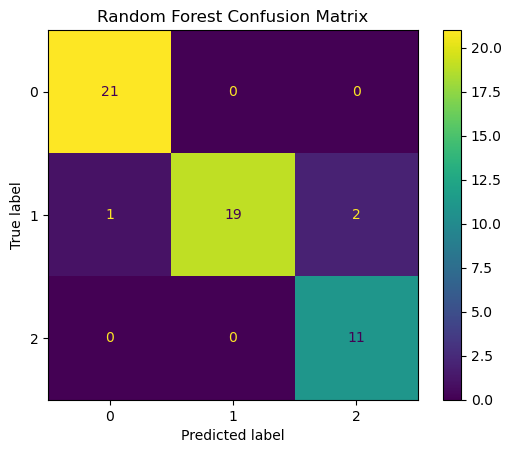

In [39]:
# 15) Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf = RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()


### 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

In [40]:
# 16) Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

estimators = [
    ('dt', DecisionTreeClassifier(random_state=3)),
    ('svm', SVC(probability=True, random_state=3)),
    ('lr', LogisticRegression(max_iter=2000))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stack.predict(X_test)))


Stacking Classifier Accuracy: 0.9736842105263158


### 37.  Train a Random Forest Classifier and print the top 5 most important features.

In [41]:
# 17) Train a Random Forest Classifier and print the top 5 most important features
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target
rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X, y)

imp = rf.feature_importances_
top5_idx = np.argsort(imp)[::-1][:5]
print("Top 5 features:")
for i in top5_idx:
    print(f"{data.feature_names[i]}: {imp[i]:.4f}")


Top 5 features:
worst concave points: 0.1365
worst perimeter: 0.1257
worst radius: 0.1232
worst area: 0.1107
mean concave points: 0.0939


### 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.


In [43]:
# 18) Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.datasets import load_wine
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=21)
bag.fit(X_train, y_train)
print(classification_report(y_test, bag.predict(X_test)))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.94      0.88      0.91        17
           2       0.95      1.00      0.97        18

    accuracy                           0.94        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.94      0.94      0.94        54



### 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

In [44]:
# 19) Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for depth in [None, 1, 2, 3, 5, 10]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=0)
    rf.fit(X_train, y_train)
    print(f"max_depth={str(depth):>4} -> Accuracy: {accuracy_score(y_test, rf.predict(X_test)):.4f}")


max_depth=None -> Accuracy: 0.9778
max_depth=   1 -> Accuracy: 0.9556
max_depth=   2 -> Accuracy: 0.9778
max_depth=   3 -> Accuracy: 0.9778
max_depth=   5 -> Accuracy: 0.9778
max_depth=  10 -> Accuracy: 0.9778


### 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

In [46]:
# 20) Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=450, n_features=10, noise=12.0, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

bag_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=30, random_state=7)
bag_knn = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=30, random_state=7)

bag_dt.fit(X_train, y_train)
bag_knn.fit(X_train, y_train)

print("Bagging (DecisionTree) MSE:", mean_squared_error(y_test, bag_dt.predict(X_test)))
print("Bagging (KNeighbors) MSE:", mean_squared_error(y_test, bag_knn.predict(X_test)))


Bagging (DecisionTree) MSE: 10909.259034238903
Bagging (KNeighbors) MSE: 8668.533992295952


### 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

In [47]:
# 21) Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score (multiclass -> macro-average)
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

X, y = load_wine(return_X_y=True)
classes = sorted(set(y))
y_bin = label_binarize(y, classes=classes)  # shape (n_samples, n_classes)
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=0)
# For training we need flattened y for classifier
y_train_flat = y_train_bin.argmax(axis=1)
y_test_flat = y_test_bin.argmax(axis=1)

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train_flat)
probs = rf.predict_proba(X_test)
print("ROC-AUC (macro):", roc_auc_score(y_test_bin, probs, average='macro'))


ROC-AUC (macro): 1.0


### 42. Train a Bagging Classifier and evaluate its performance using cross-validation.

In [49]:
# 22) Train a Bagging Classifier and evaluate its performance using cross-validation
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X, y = load_iris(return_X_y=True)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
scores = cross_val_score(bag, X, y, cv=5, scoring='accuracy')
print("Cross-val accuracies:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-val accuracies: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV accuracy: 0.9666666666666668


### 43. Train a Random Forest Classifier and plot the Precision-Recall curve.

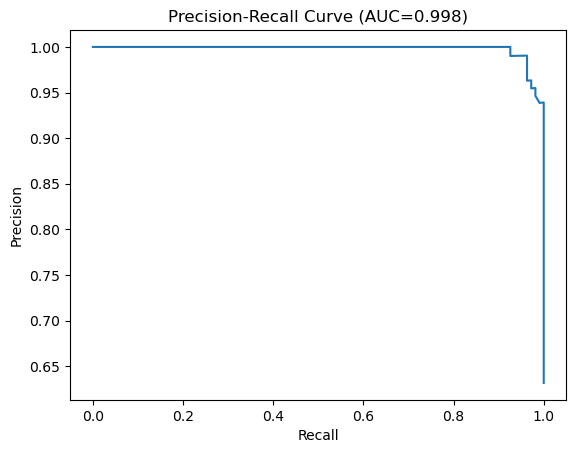

In [50]:
# 23) Train a Random Forest Classifier and plot the Precision-Recall curve (for a binary dataset)
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
probs = rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, probs)
pr_auc = auc(recall, precision)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AUC={pr_auc:.3f})")
plt.show()


### 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

In [51]:
# 24) Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
from sklearn.datasets import load_wine
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

estimators = [('rf', RandomForestClassifier(n_estimators=100, random_state=10))]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack.fit(X_train, y_train)
print("Stacking (RF -> LR) Accuracy:", accuracy_score(y_test, stack.predict(X_test)))


Stacking (RF -> LR) Accuracy: 0.9629629629629629


### 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

In [53]:
# 25) Train a Bagging Regressor with different levels of bootstrap samples and compare performance
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=500, n_features=12, noise=15.0, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

for max_samples in [0.5, 0.7, 1.0]:
    bag = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, max_samples=max_samples, random_state=5)
    bag.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bag.predict(X_test))
    print(f"max_samples={max_samples:.2f} -> MSE: {mse:.4f}")


max_samples=0.50 -> MSE: 5226.2059
max_samples=0.70 -> MSE: 5089.6083
max_samples=1.00 -> MSE: 4854.2193
